<a href="https://colab.research.google.com/github/hellojohnkim/mmai823/blob/main/Session_4_PairTrading_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use simulated price to show the idea behind pair trading
## See slides for explanations

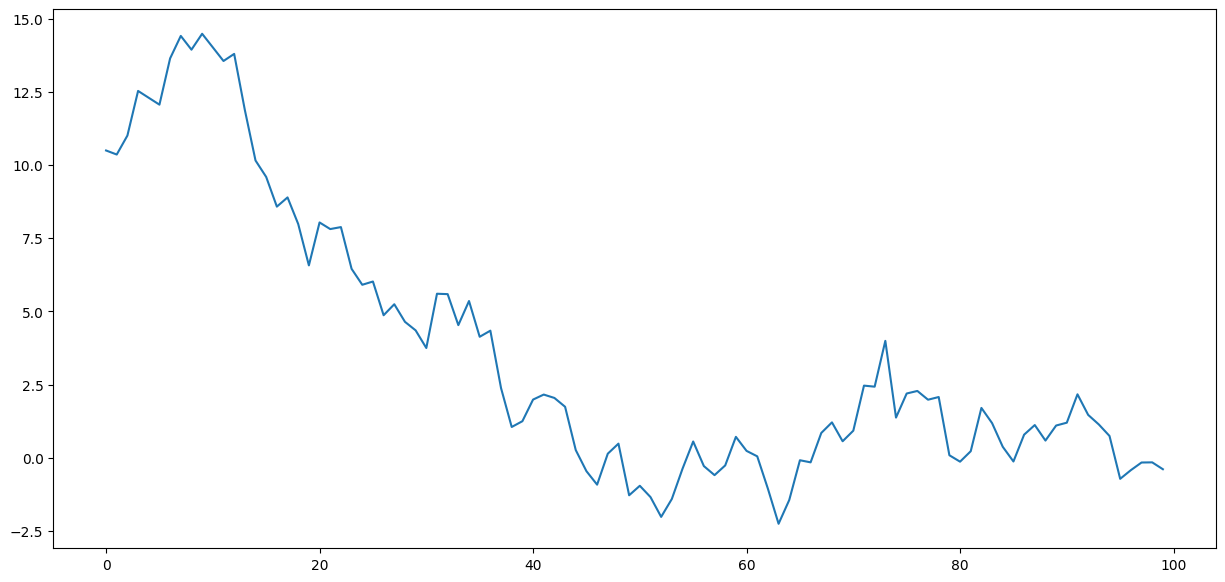

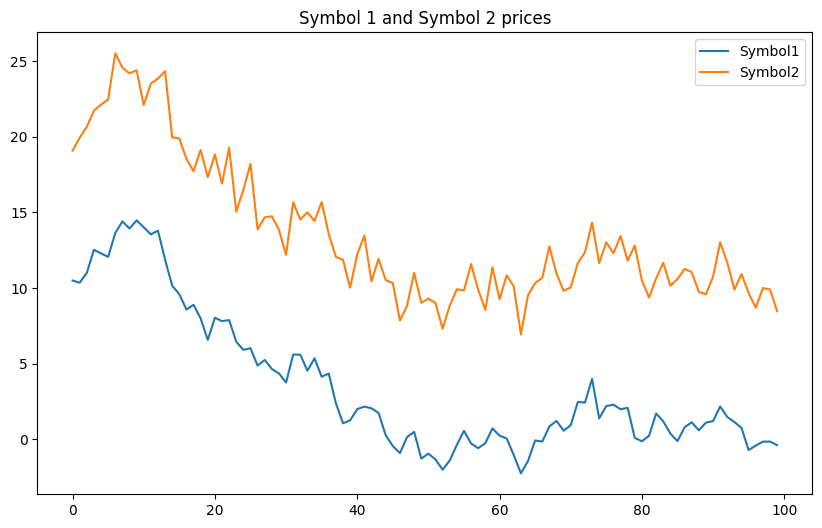

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

from statsmodels.tsa.stattools import coint

# Set a seed value to make the experience reproducible
np.random.seed(42)

# Generate Symbol1 daily returns
Symbol1_returns = np.random.normal(0, 1, 100)
# Create a series for Symbol1 prices
Symbol1_prices = pd.Series(np.cumsum(Symbol1_returns),\
                           name='Symbol1') + 10
Symbol1_prices.plot(figsize=(15,7))
plt.show()

# Create a series for Symbol2 prices
# We are going to mimikate the Symbol1 behavior
noise = np.random.normal(0, 1, 100)
Symbol2_prices = Symbol1_prices + 10 + noise
Symbol2_prices.name = 'Symbol2'


plt.title("Symbol 1 and Symbol 2 prices")
Symbol1_prices.plot(figsize=(10, 6))
Symbol2_prices.plot(figsize=(10, 6))
plt.legend()
plt.show()


#### In statistics, the standard-, or Z-score is the number of standard deviations by which the value of a raw score is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores

P-value:
 1.067239568675346e-17


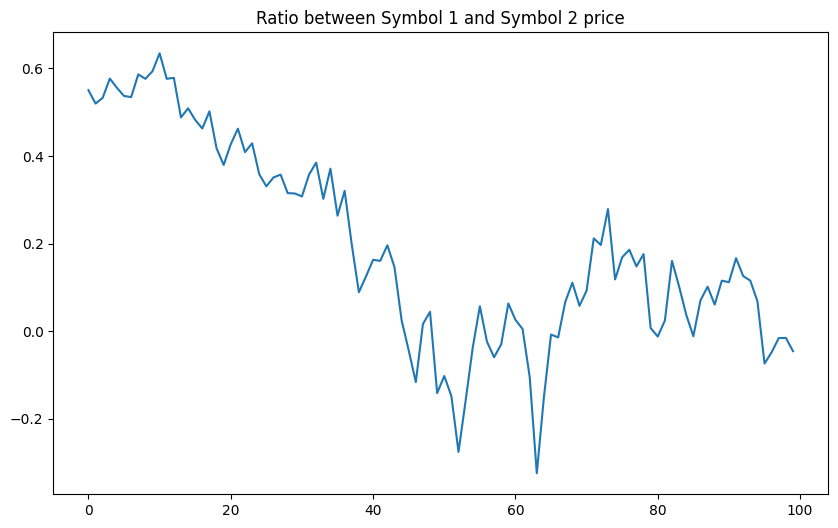

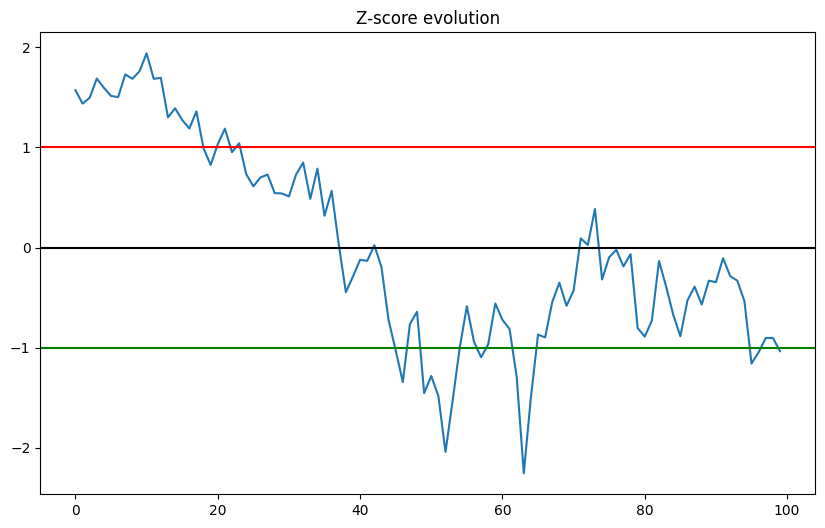

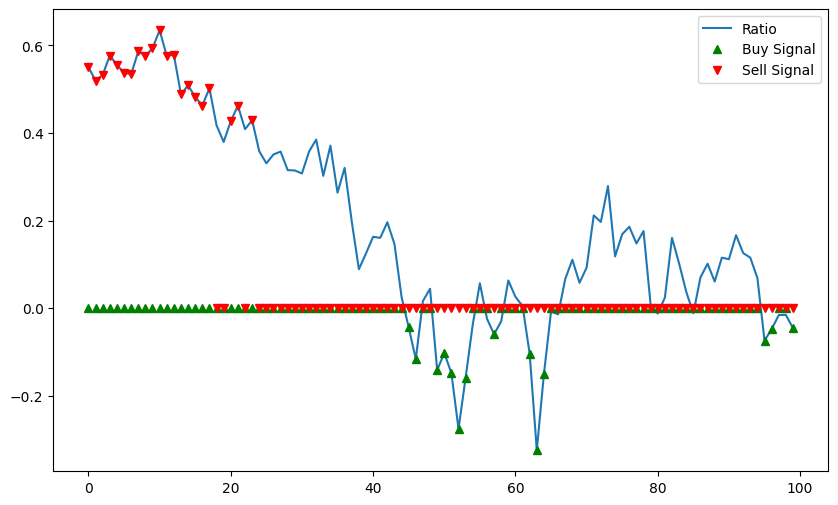

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print('P-value:\n', pvalue)

ratios = Symbol1_prices / Symbol2_prices
plt.title("Ratio between Symbol 1 and Symbol 2 price")

ratios.plot(figsize=(10, 6))
plt.savefig('ratio-plot.jpg')
plt.show()

#show the ration 1 std away
zscore(ratios).plot(figsize=(10, 6))
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.savefig('z-score-range.jpg')
plt.show()

ratios.plot(figsize=(10, 6))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")

plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.savefig('z-score.jpg')
plt.show()

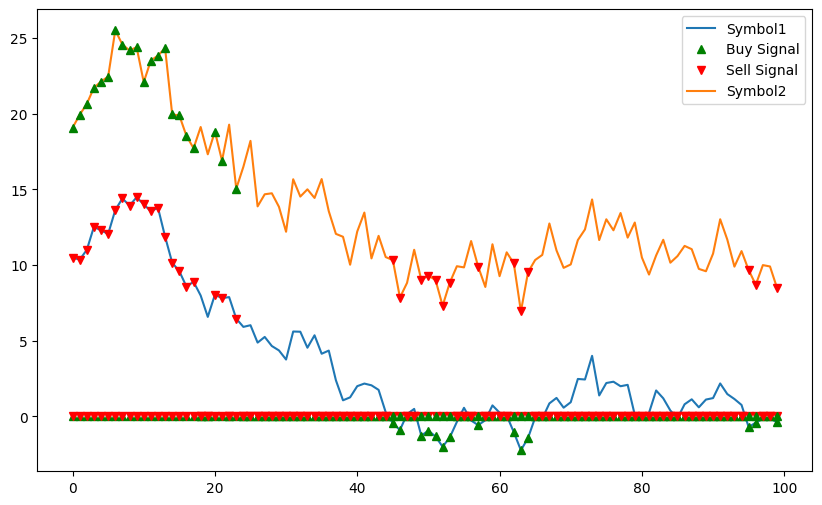

In [ ]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot(figsize=(10, 6))
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot(figsize=(10, 6))
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")

plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.savefig('pairtrading-b&s.jpg')
plt.show()

# Example: Pair Trading

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

import seaborn

try:
    import statsmodels
    print("module 'statsmodels' is installed")
except ModuleNotFoundError:
    print("module 'statsmodels' is not installed")
    !pip install statsmodels
from statsmodels.tsa.stattools import coint

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf

tickers = ['^GSPC','AAPL','ADBE','LUV','MSFT', 'SKYW','QCOM', 'HPQ','JNPR','AMD','IBM']

start_date='2010-01-01'
end_date = '2021-12-01'

data=yf.download(tickers,start_date, end_date)['Adj Close'].dropna()

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:   #we choose p-value level at 2%
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs




module 'statsmodels' is installed
module 'yfinance' is installed


[*********************100%%**********************]  11 of 11 completed


In [ ]:
data

Ticker,AAPL,ADBE,AMD,HPQ,IBM,JNPR,LUV,MSFT,QCOM,SKYW,^GSPC
Date,,,,,,,,,,,
2010-01-04,6.470741,37.090000,9.700000,16.406693,76.767410,21.433456,10.027976,23.431585,32.535511,15.126352,1132.989990
2010-01-05,6.481929,37.700001,9.710000,16.475513,75.840080,21.094366,10.557178,23.439157,33.318768,15.466474,1136.520020
2010-01-06,6.378824,37.619999,9.570000,16.322237,75.347389,20.526594,10.243242,23.295319,32.993000,14.956292,1137.140015
2010-01-07,6.367032,36.889999,9.470000,16.328487,75.086609,20.629108,10.395724,23.053045,33.949505,15.224808,1141.689941
2010-01-08,6.409363,36.689999,9.430000,16.450474,75.840080,20.700081,10.162518,23.212036,34.289135,14.768332,1144.979980
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,159.383240,665.159973,149.919998,29.891626,105.048981,30.174284,45.458950,330.992828,170.981476,44.549999,4690.700195
2021-11-24,159.906586,668.320007,157.800003,32.909573,104.995010,30.258278,45.468632,331.218323,170.764145,44.230000,4701.459961
2021-11-26,154.840958,662.099976,154.809998,32.110985,104.167496,29.352961,43.504353,323.151276,166.067673,41.060001,4594.620117


In [ ]:
data=data.loc[:,tickers]

In [ ]:
data

Ticker,^GSPC,AAPL,ADBE,LUV,MSFT,SKYW,QCOM,HPQ,JNPR,AMD,IBM
Date,,,,,,,,,,,
2010-01-04,1132.989990,6.470741,37.090000,10.027976,23.431585,15.126352,32.535511,16.406693,21.433456,9.700000,76.767410
2010-01-05,1136.520020,6.481929,37.700001,10.557178,23.439157,15.466474,33.318768,16.475513,21.094366,9.710000,75.840080
2010-01-06,1137.140015,6.378824,37.619999,10.243242,23.295319,14.956292,32.993000,16.322237,20.526594,9.570000,75.347389
2010-01-07,1141.689941,6.367032,36.889999,10.395724,23.053045,15.224808,33.949505,16.328487,20.629108,9.470000,75.086609
2010-01-08,1144.979980,6.409363,36.689999,10.162518,23.212036,14.768332,34.289135,16.450474,20.700081,9.430000,75.840080
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,4690.700195,159.383240,665.159973,45.458950,330.992828,44.549999,170.981476,29.891626,30.174284,149.919998,105.048981
2021-11-24,4701.459961,159.906586,668.320007,45.468632,331.218323,44.230000,170.764145,32.909573,30.258278,157.800003,104.995010
2021-11-26,4594.620117,154.840958,662.099976,43.504353,323.151276,41.060001,166.067673,32.110985,29.352961,154.809998,104.167496


In [ ]:
data.keys()

Index(['^GSPC', 'AAPL', 'ADBE', 'LUV', 'MSFT', 'SKYW', 'QCOM', 'HPQ', 'JNPR',
       'AMD', 'IBM'],
      dtype='object', name='Ticker')

[('ADBE', 'MSFT')]


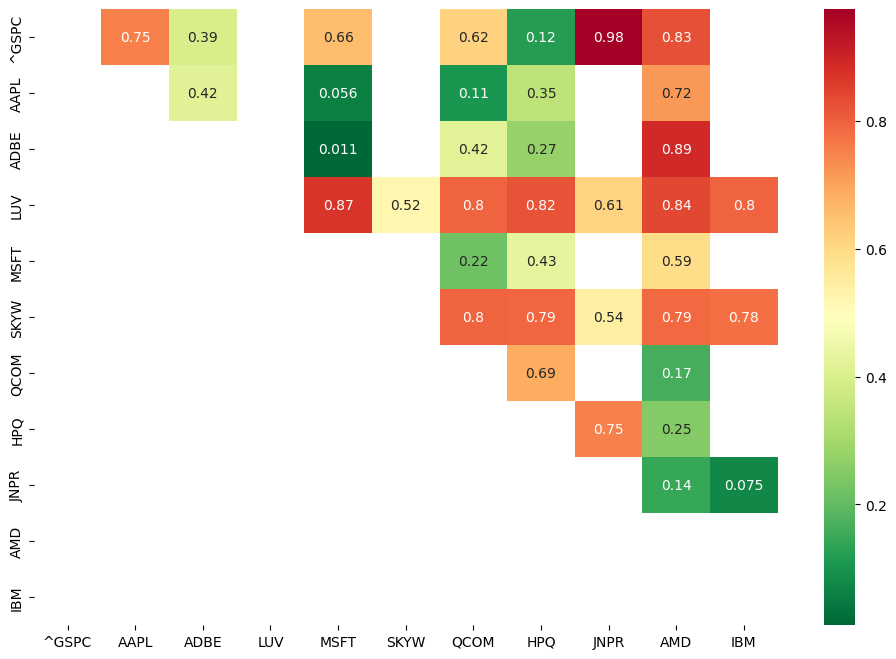

In [ ]:
pvalues, pairs = find_cointegrated_pairs(data)
print(pairs)

sns_plot=seaborn.heatmap(pvalues, xticklabels=data.keys(),
                yticklabels=tickers, cmap='RdYlGn_r',annot=True,
                   mask = (pvalues >= 0.98))
fig=sns_plot.get_figure()
fig.savefig('correlation.jpg')
plt.show()

## Now choose ADBE and MSFT

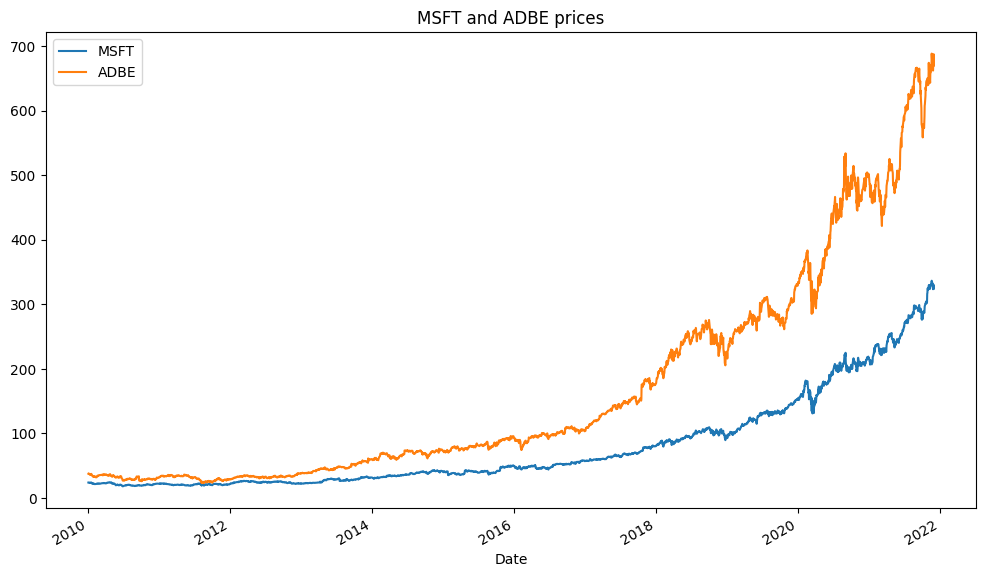

In [ ]:
Symbol1_prices = data['MSFT']
Symbol2_prices = data['ADBE']
#Symbol2_prices.name = 'ADBE'
plt.title("MSFT and ADBE prices")
Symbol1_prices.plot(figsize=(12,7))
Symbol2_prices.plot()
plt.legend()
plt.savefig('MSFT+ADBE.jpg')
plt.show()



## Define the Z-score

0.016216978512114146


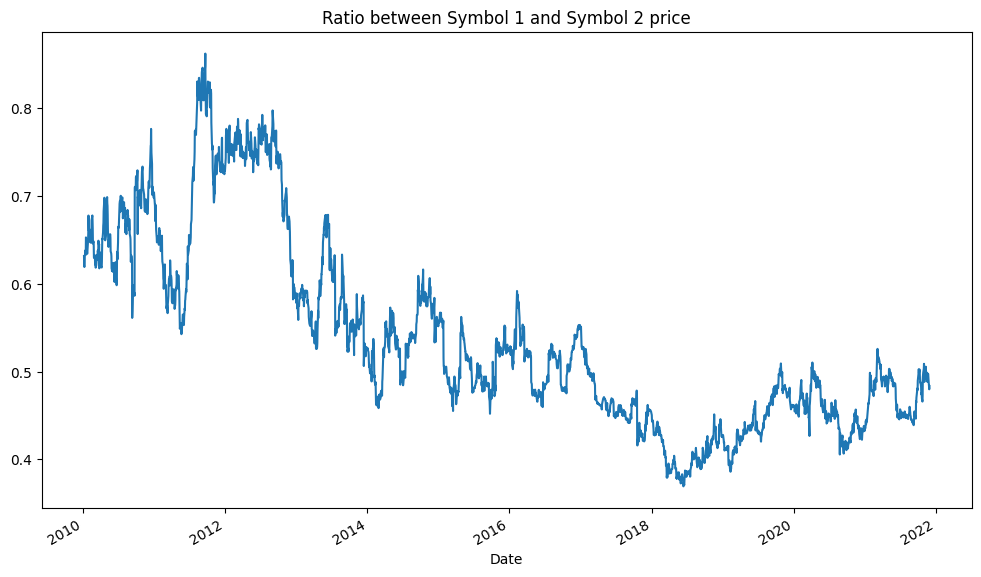

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)
ratios = Symbol1_prices / Symbol2_prices
plt.title("Ratio between Symbol 1 and Symbol 2 price")

ratios.plot(figsize=(12,7))
plt.show()


## Identify the Buy/Sell signals

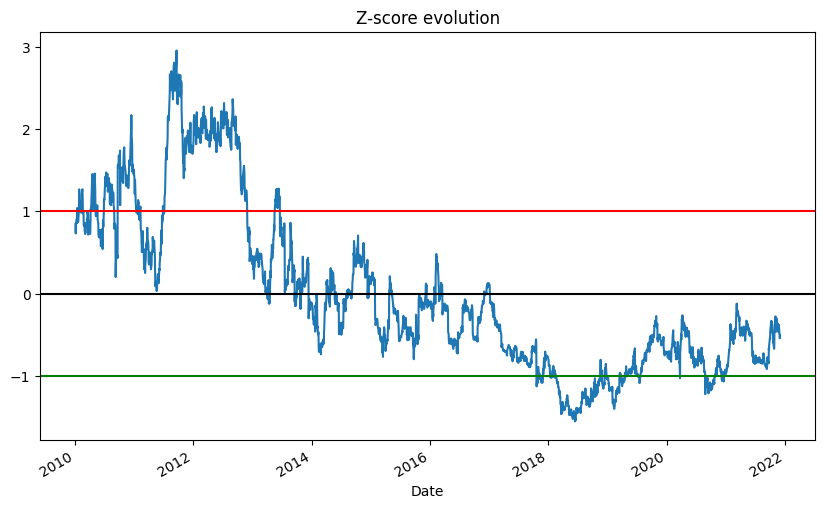

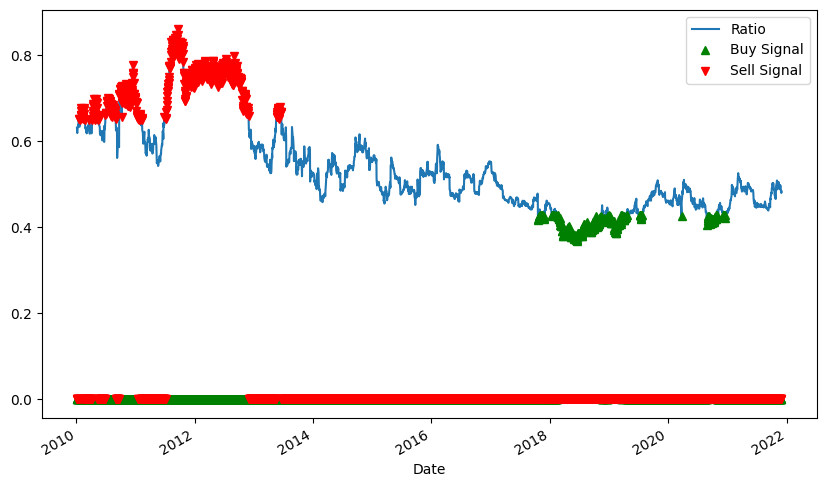

In [ ]:
#Choose k=1
zscore(ratios).plot(figsize=(10,6))
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

ratios.plot(figsize=(10,6))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

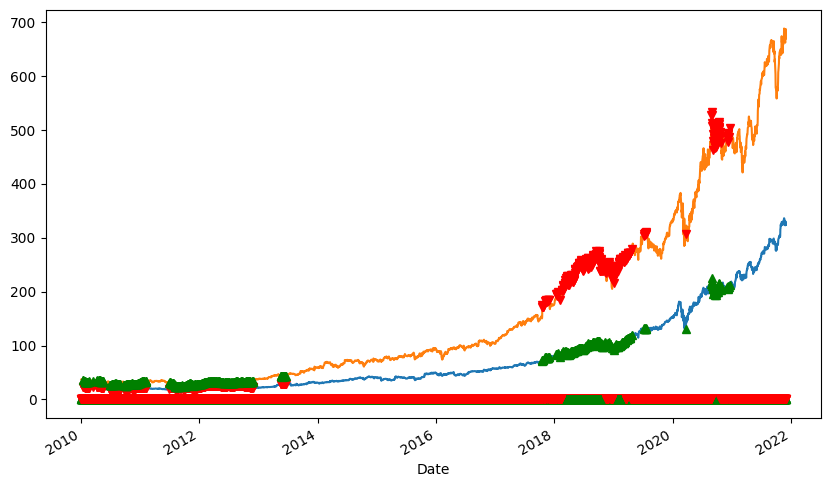

In [ ]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot(figsize=(15,10))
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot(figsize=(10,6))
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")
plt.savefig('MSFT-ADBE-buy-sell.jpg')
plt.show()

## Backtesting the strategy
### See slides for the exit strategy

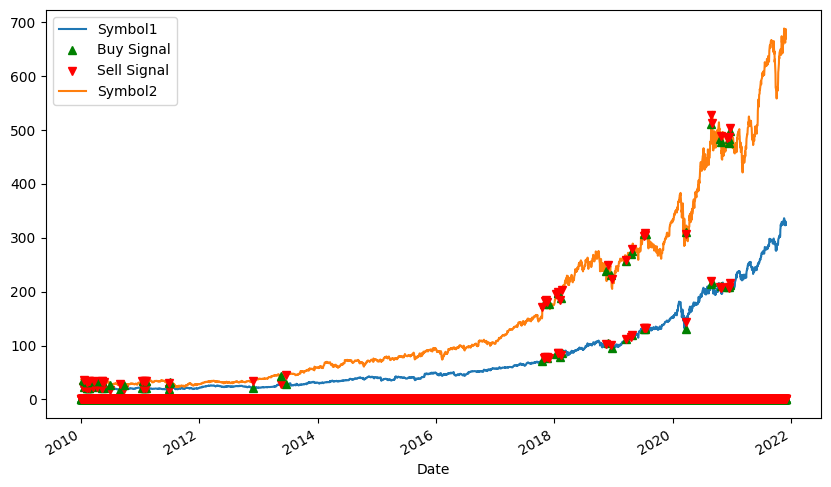

In [ ]:

pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))


position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0

Symbol1_prices.plot(figsize=(10,6))
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
Symbol2_prices.plot()
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")

plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.savefig('MSFT-ADBE-pair-strategy.jpg')
plt.show()

In [ ]:
pair_correlation_trading_strategy[:60]

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell
Date,,,,,
2010-01-04,23.431585,0.000000,0.000000,0.000000,0.000000
2010-01-05,23.439157,0.000000,0.000000,0.000000,0.000000
2010-01-06,23.295319,0.000000,0.000000,0.000000,0.000000
2010-01-07,23.053045,0.000000,0.000000,0.000000,0.000000
2010-01-08,23.212036,0.000000,0.000000,0.000000,0.000000
2010-01-11,22.916773,0.000000,0.000000,0.000000,0.000000
2010-01-12,22.765360,0.000000,0.000000,0.000000,0.000000
2010-01-13,22.977343,0.000000,0.000000,0.000000,0.000000
2010-01-14,23.439157,0.000000,23.439157,35.900002,0.000000


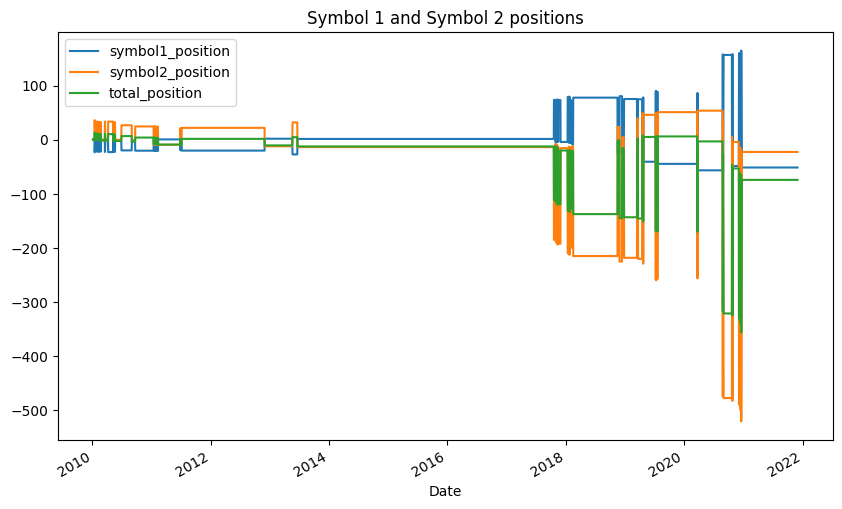

In [ ]:
#position
#assume that we only buy/sell one share, regardless of the price deifference
pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(15,10))
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(15,10))

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(10,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

## Comments
Intuitively, it makes sense to long/short the same  amount in both stocks. Suppose we have a pair of two symbols (Symbol1 and Symbol2). Let's assume that the Symbol1 price is \\$100 and the Symbol2 price is \\$10. If we invest \\$10,000, we long/short 100 shares of Symbol1, and short/long 1000 shares of Symbol2.

Now, let's suppose the price of Symbol 2 is \\$3 instead of being \\$10. When dividing \\$10,000 / \\$3 = 3,333 + 1/3. This means we will send an order for 3,333 shares, which means that we will have a Symbol 1 position of \\$10,000 and a Symbol 2 position of 3,333 x \\$3 = \\$9,999, resulting of an unhedged amount \\$1.

Now suppose that the traded amount, instead of being \\$10,000, was \\$10,000,000. This will result in a unhedged amount of \\$1,000. Because we need to remove the decimal part when buying stocks, this delta will appear for any symbols. If we trade around 200 pairs of symbols, we may have \\$200,000 (200 x \\$1,000) of position that is not hedged. We will be exposed to market moves. Therefore, if the market goes down, we may lose out on this \\$200,000. That's why it will be important to hedge with a financial instrument going in the opposite direction from this \\$200,000 position. If we have positions with many symbols, resulting in having a residual of \\$200,000 of a long position that is not covered, we will get a short position of the S&P500 (or SPY) behaving in the same way as the market moves.

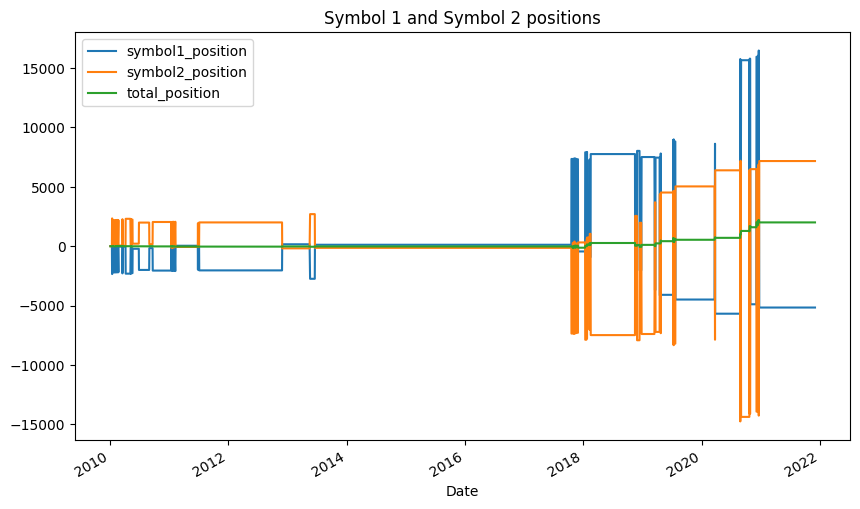

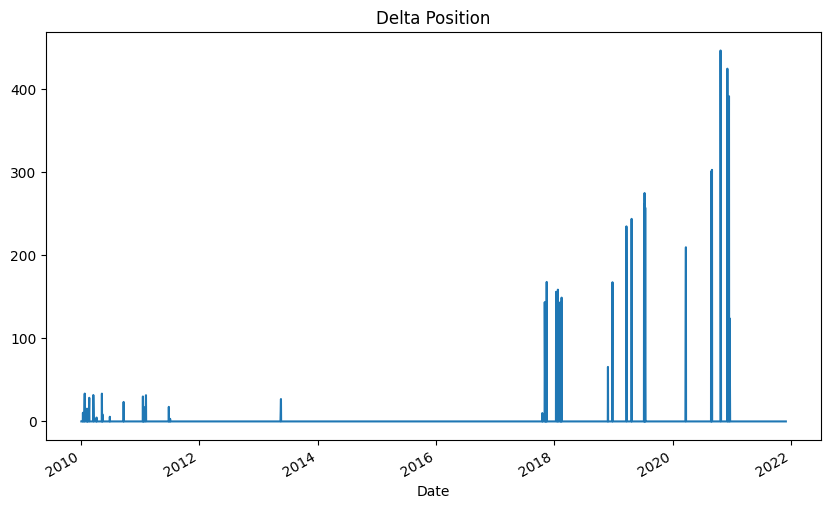

In [ ]:
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['delta']=np.zeros(len(Symbol1_prices))


position=0
s1_shares = 100
for i in range(len(Symbol1_prices)):
    s1positions= Symbol1_prices[i] * s1_shares
    s2positions= Symbol2_prices[i] * int(s1positions/Symbol2_prices[i])
    #print(Symbol1_prices[i],Symbol2_prices[i])
    delta_position=s1positions-s2positions
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i]=delta_position
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i] = delta_position
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        position = 0

pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(10,6))
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(10,6))

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(10,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()


pair_correlation_trading_strategy['delta'].plot(figsize=(10,6))
plt.title("Delta Position")
plt.show()

<Axes: xlabel='Date'>

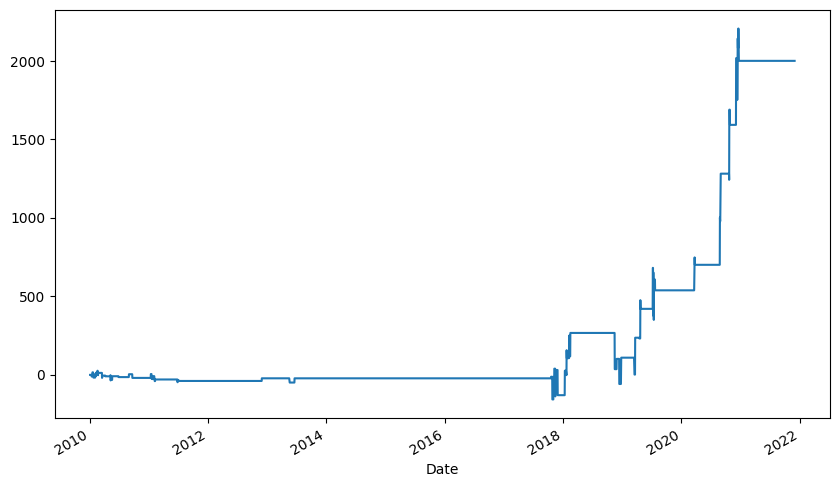

In [ ]:
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(10,6))